# Examen 2 - Portafolios de inversión - O2018. Tipo 3.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/ac/Exchange_Financial_markets_Centrum_Pieniadza_NBP_AB.jpg" width="600px" height="400px" />

**Resumen.**
> Este examen pretende evaluar los conocimientos que hemos adquirido a lo largo de los dos módulos finales.

> El examen consta de dos partes. 
1. La primera trata de construir una estrategia de inversión óptima con un conjunto de activos riesgosos y un activo libre de riesgo. Deberás importar un archivo donde se encuentran reportados los precios ajustados en el cierre de dos compañías en una base mensual, deberás caracterizar los rendimientos y con base en ello construir el portafolio eficiente en media varianza, además de combinarlo con el activo libre de riesgo de acuerdo al perfil de aversión al riesgo dado.
2. La segunda parte trata de realizar la estimación de una medida de riesgo sistemático de un activo ($\beta$).

**Criterio de revisión.**
> Primera parte: tiene un valor del 70% del examen. 

> Segunda parte: tiene un valor del 30% del examen. 

> En ambas partes se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, nombrar este archivo *Examen2_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Examen2_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir a moodle.
___

## I. Primera parte. Construyendo un portafolio con activos representativos de la BMV (70%)

**Punto 1 (20%).** En el archivo `dataMX.csv` se encuentran reportados los precios mensuales ajustados en el cierre de los activos de Grupo Financiero Banorte, Grupo Financiero Inbursa, Cemex, Grupo Carso, Kimberly Clark de México, Grupo Bimbo y Alfa.

Adicionalmente, la tasa de los Cetes a un mes reportados en la página de [Banxico](http://www.anterior.banxico.org.mx/portal-mercado-valores/index.html) es de $7.94\%$ (esta tasa es anual).

1. Importar todos los precios en un DataFrame indizado por fecha. Mostrar la gráfica de estos precios (5%).
2. Obtener un DataFrame con los rendimientos porcentuales mensuales para estos activos. Mostrar la gráfica de rendimientos (5%).
3. Reportar en un DataFrame el rendimiento esperado mensual y la volatilidad mensual para cada uno de estos activos (5%).
4. Calcular las matrices de varianza-covarianza (base mensual) y de correlación (base mensual) para estos activos (5%).

In [372]:
# Importar paquetes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import scipy.optimize as opt

In [373]:
rf = .0794/12
data = pd.read_csv("dataMX.csv", index_col='Date') 
data


,GFNORTEO.MX,GFINBURO.MX,CEMEXCPO.MX,GCARSOA1.MX,KIMBERA.MX,BIMBOA.MX,ALFAA.MX
Date,,,,,,,
2010-01-01,36.511715,17.455875,8.782900,17.516596,12.238914,19.514021,8.023372
2010-02-01,40.561028,19.332382,8.965570,19.666124,14.198348,22.107986,8.202198
2010-03-01,46.490009,18.503229,9.308990,19.999195,14.692957,25.792648,9.263737
2010-04-01,43.550842,18.075560,10.733800,19.462833,14.965379,23.331467,9.236691
2010-05-01,43.031155,18.682150,10.595000,18.377281,15.294024,22.207493,8.817235
2010-06-01,42.858467,18.735237,9.529370,18.059097,16.216290,22.219580,9.332152
2010-07-01,42.354156,20.059361,9.103820,20.865467,17.357679,23.046104,9.511506
2010-08-01,40.593315,21.895178,7.811960,25.656891,17.132395,21.886066,8.744915
2010-09-01,40.781372,22.397896,8.191910,27.843971,17.993498,22.306580,9.378437


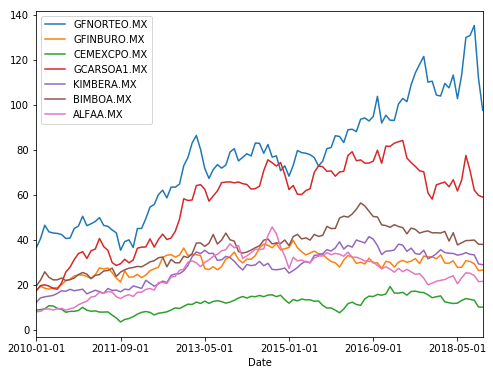

In [374]:

data.plot(figsize=(8,6));

In [375]:
# Rendimientos mensuales
monthly_ret = data.pct_change().dropna()
monthly_ret

,GFNORTEO.MX,GFINBURO.MX,CEMEXCPO.MX,GCARSOA1.MX,KIMBERA.MX,BIMBOA.MX,ALFAA.MX
Date,,,,,,,
2010-02-01,0.110904,0.107500,0.020798,0.122714,0.160099,0.132928,0.022288
2010-03-01,0.146174,-0.042889,0.038304,0.016936,0.034836,0.166667,0.129421
2010-04-01,-0.063221,-0.023113,0.153057,-0.026819,0.018541,-0.095422,-0.002920
2010-05-01,-0.011933,0.033559,-0.012931,-0.055776,0.021960,-0.048174,-0.045412
2010-06-01,-0.004013,0.002842,-0.100579,-0.017314,0.060302,0.000544,0.058399
2010-07-01,-0.011767,0.070676,-0.044657,0.155399,0.070385,0.037198,0.019219
2010-08-01,-0.041574,0.091519,-0.141903,0.229634,-0.012979,-0.050336,-0.080596
2010-09-01,0.004633,0.022960,0.048637,0.085243,0.050262,0.019214,0.072445
2010-10-01,0.103961,0.070742,0.003711,0.121611,-0.034150,0.031419,0.052951


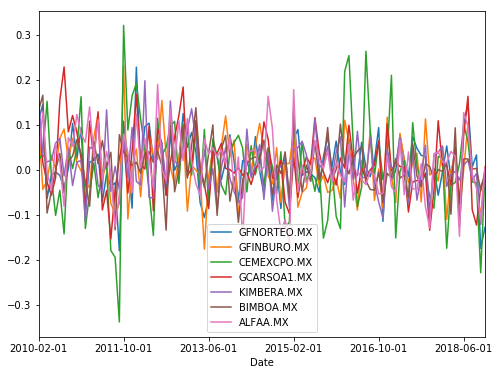

In [376]:
# Gráfico de histórico de precios diarios
monthly_ret.plot(figsize=(8,6));


In [377]:
# Podemos resumir en un DataFrame
names = 'GFNORTEO.MX', 'GFINBURO.MX', 'CEMEXCPO.MX', 'GCARSOA1.MX', 'KIMBERA.MX', 'BIMBOA.MX', 'ALFAA.MX'
monthly_summary = pd.DataFrame(index= ['Mean', 'Volatility'], columns = names)
monthly_summary.loc['Mean']= monthly_ret.mean()
monthly_summary.loc['Volatility']= monthly_ret.std()
monthly_summary

,GFNORTEO.MX,GFINBURO.MX,CEMEXCPO.MX,GCARSOA1.MX,KIMBERA.MX,BIMBOA.MX,ALFAA.MX
Mean,0.0115783,0.00615974,0.00682374,0.0139643,0.00998281,0.00792641,0.0118888
Volatility,0.0676415,0.0669772,0.104974,0.0711668,0.0612472,0.0573827,0.0716058


In [378]:
cov = monthly_ret.cov()
cov

,GFNORTEO.MX,GFINBURO.MX,CEMEXCPO.MX,GCARSOA1.MX,KIMBERA.MX,BIMBOA.MX,ALFAA.MX
GFNORTEO.MX,0.004575,0.001838,0.002459,0.001904,0.001536,0.001599,0.002251
GFINBURO.MX,0.001838,0.004486,0.002021,0.002137,0.001028,0.001117,0.000971
CEMEXCPO.MX,0.002459,0.002021,0.011020,0.002034,0.001393,0.000117,0.002274
GCARSOA1.MX,0.001904,0.002137,0.002034,0.005065,0.001225,0.001105,0.002038
KIMBERA.MX,0.001536,0.001028,0.001393,0.001225,0.003751,0.001363,0.001521
BIMBOA.MX,0.001599,0.001117,0.000117,0.001105,0.001363,0.003293,0.001149
ALFAA.MX,0.002251,0.000971,0.002274,0.002038,0.001521,0.001149,0.005127


In [379]:
corr = monthly_ret.corr()
corr


,GFNORTEO.MX,GFINBURO.MX,CEMEXCPO.MX,GCARSOA1.MX,KIMBERA.MX,BIMBOA.MX,ALFAA.MX
GFNORTEO.MX,1.000000,0.405631,0.346268,0.395465,0.370840,0.411984,0.464654
GFINBURO.MX,0.405631,1.000000,0.287452,0.448323,0.250613,0.290589,0.202391
CEMEXCPO.MX,0.346268,0.287452,1.000000,0.272247,0.216618,0.019363,0.302549
GCARSOA1.MX,0.395465,0.448323,0.272247,1.000000,0.281031,0.270536,0.399852
KIMBERA.MX,0.370840,0.250613,0.216618,0.281031,1.000000,0.387681,0.346774
BIMBOA.MX,0.411984,0.290589,0.019363,0.270536,0.387681,1.000000,0.279661
ALFAA.MX,0.464654,0.202391,0.302549,0.399852,0.346774,0.279661,1.000000


**Punto 2 (25%).** Usando los datos del punto anterior:

1. Halle los pesos del portafolio de mínima varianza considerando todos los activos riesgosos. También reportar claramente el rendimiento esperado, volatilidad y cociente de Sharpe para dicho portafolio (10%).
2. Halle los pesos del portafolio EMV considerando todos los activos riesgosos. También reportar claramente el rendimiento esperado, volatilidad y cociente de Sharpe para dicho portafolio (10%).
3. Halle la covarianza y la correlación entre los dos portafolios hallados (5%)

In [380]:
# Importamos minimize del módulo optimize
from scipy.optimize import minimize

In [381]:
## Construcción de parámetros
# 1. Sigma: matriz de varianza-covarianza
D = np.diag(monthly_summary.loc['Volatility'])
Sigma = D.dot(corr).dot(D)
# 2. Eind: rendimientos esperados activos individuales
Eind = np.array(monthly_summary.loc['Mean'])
Eind

array([0.011578330213311382, 0.006159739385572388, 0.006823740024972436,
       0.013964309584764106, 0.00998281292240722, 0.007926412553511824,
       0.01188879091972431], dtype=object)

In [382]:
# Min Varianza
def varianza(w, Sigma):
    return w.dot(Sigma).dot(w)

In [383]:
# Dato inicial
w0 = np.ones((7,))/7
# Cotas de las variables
bnds = ((0,None),)*7
# Restricciones
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w)-1},)

In [384]:
# Portafolio de mínima varianza
minvar= minimize(varianza, w0, args = (Sigma,), constraints=cons)
minvar

     fun: 0.0018837979357921035
     jac: array([ 0.00420931,  0.00373352,  0.00331713,  0.00406981,  0.00362414,
        0.00347378,  0.00394943])
 message: 'Optimization terminated successfully.'
    nfev: 45
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 0.1143865 ,  0.16624858,  0.015743  ,  0.12767994,  0.20159254,
        0.24283916,  0.13151028])

In [385]:
# Pesos, rendimiento y riesgo del portafolio de mínima varianza
w_minvar = minvar.x
Er_minvar = Eind.dot(w_minvar)
s_minvar = np.sqrt(varianza(w_minvar, Sigma))
w_minvar, Er_minvar, s_minvar

(array([ 0.1143865 ,  0.16624858,  0.015743  ,  0.12767994,  0.20159254,
         0.24283916,  0.13151028]), 0.009739643105468926, 0.04340274110919843)

In [386]:
minvar_sharpe = (Er_minvar-rf)/s_minvar
minvar_sharpe

0.071953437939439285

In [387]:
#EMV
def m_sharpe_r(w, Sigma, rf, Eind):
    Erp = Eind.dot(w)
    varp = w.dot(Sigma).dot(w)
    return -(Erp-rf)/np.sqrt(varp)

In [388]:
# Dato inicial
w0 = np.ones((7,))/7
# Cotas de las variables
bnds = ((0,None),)*7
# Restricciones
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w)-1},)

In [389]:
# Portafolio EMV
EMV = minimize(m_sharpe_r, w0, args=(Sigma,rf, Eind), constraints = cons)
EMV

#En este problema no se pudo concretar correctamente la EMV puesto que no fue optimizada correctamente por la función. 
# Puede ser por esta versión de python. 

     fun: -0.139885963118247
     jac: array([-0.06311022, -0.06272118, -0.06269534, -0.06246158, -0.06306176,
       -0.0626741 , -0.0631217 ])
 message: 'Optimization terminated successfully.'
    nfev: 163
     nit: 18
    njev: 18
  status: 0
 success: True
       x: array([ 0.69881732, -0.84378636, -0.30455753,  1.20752698,  0.37447005,
       -0.38743058,  0.25496011])

In [390]:
# Pesos, rendimiento y riesgo del portafolio EMV
w_EMV = EMV.x
Er_EMV = Eind.dot(w_EMV)
s_EMV = np.sqrt(w_EMV.dot(Sigma.dot(w_EMV)))
w_EMV, Er_EMV, s_EMV

(array([ 0.69881732, -0.84378636, -0.30455753,  1.20752698,  0.37447005,
        -0.38743058,  0.25496011]), 0.021376190148047244, 0.1055111117110743)

In [391]:
emv_sharpe = (Er_EMV-rf)/s_EMV
emv_sharpe

0.139885963118247

In [392]:
# Covarianza entre los portafolios
cov = w_minvar.dot(Sigma).dot(w_EMV)
cov

0.002356807648965932

In [393]:
# Correlación entre los portafolios
corr = cov/(s_minvar*s_EMV)
corr

0.51464621334535721

**Punto 3 (10%).** Con los portafolios que se encontraron en el punto anterior (de mínima varianza y EMV):

1. Construya la frontera de mínima varianza calculando el rendimiento esperado y volatilidad para varias combinaciones de los anteriores portafolios. Reportar dichas combinaciones en un DataFrame incluyendo pesos, rendimiento, volatilidad y cociente de Sharpe (5%).
2. También construya la línea de asignación de capital entre el activo libre de riesgo y el portafolio EMV. Reportar las combinaciones de estos activos en un DataFrame incluyendo pesos, rendimiento, volatilidad y cociente de Sharpe (5%).

In [394]:
# Vector de w
w = np.linspace(-2, 4, 100)

In [395]:
# DataFrame de Frontera de minima varianza: 
# 1. Índice: i
# 2. Columnas 1-2: w, 1-w
# 3. Columnas 3-4: E[r], sigma
# 4. Columna 5: Sharpe ratio

frontera = pd.DataFrame(columns=['w(EMV)', 'w(minvar)', 'E[r]', 'sigma', 'R.S.'])
frontera['w(EMV)'] = w
frontera['w(minvar)'] = 1-w
frontera['E[r]'] = w*Er_EMV +(1-w)*Er_minvar
frontera['sigma'] = np.sqrt((w*s_EMV)**2 + ((1-w)*s_minvar)**2 + 2*w*(1-w)*cov)
frontera['R.S.'] = (frontera['E[r]']-rf)/frontera['sigma']
frontera

,w(EMV),w(minvar),E[r],sigma,R.S.
0,-2.000000,3.000000,-0.013533,0.182217,-0.110583
1,-1.939394,2.939394,-0.012828,0.176856,-0.109948
2,-1.878788,2.878788,-0.012123,0.171505,-0.109266
3,-1.818182,2.818182,-0.011418,0.166165,-0.108533
4,-1.757576,2.757576,-0.010712,0.160838,-0.107743
5,-1.696970,2.696970,-0.010007,0.155525,-0.106889
6,-1.636364,2.636364,-0.009302,0.150226,-0.105964
7,-1.575758,2.575758,-0.008597,0.144945,-0.104960
8,-1.515152,2.515152,-0.007891,0.139682,-0.103866
9,-1.454545,2.454545,-0.007186,0.134439,-0.102670


In [396]:
# Vector de wp variando entre 0 y 1.5 con n pasos
n = 101
wp = np.linspace(0, 3, n)


In [397]:
# DataFrame de LAC: 
# 1. Índice: i
# 2. Columnas 1-2: wp, wrf
# 3. Columnas 3-4: E[r], sigma
# 4. Columna 5: Sharpe ratio
LAC = pd.DataFrame(index=np.arange(n), columns=['wp','wrf','E[r]','sigma','SR'])
LAC['wp'] = wp
LAC['wrf']= 1-wp
LAC['E[r]']= wp*Er_EMV+(1-wp)*rf
LAC['sigma']= wp*s_EMV
LAC['SR'] = (LAC['E[r]']-rf)/LAC['sigma']

LAC.round(4)

,wp,wrf,E[r],sigma,SR
0,0.00,1.00,0.0066,0.0000,NaN
1,0.03,0.97,0.0071,0.0032,0.1399
2,0.06,0.94,0.0075,0.0063,0.1399
3,0.09,0.91,0.0079,0.0095,0.1399
4,0.12,0.88,0.0084,0.0127,0.1399
5,0.15,0.85,0.0088,0.0158,0.1399
6,0.18,0.82,0.0093,0.0190,0.1399
7,0.21,0.79,0.0097,0.0222,0.1399
8,0.24,0.76,0.0102,0.0253,0.1399
9,0.27,0.73,0.0106,0.0285,0.1399


**Punto 4 (15%).** 

1. Usando todos los datos obtenidos, grafique:
 - los activos individuales,
 - portafolio de mínima varianza,
 - portafolio eficiente en media-varianza (EMV),
 - frontera de mínima varianza, y
 - línea de asignación de capital,
en el espacio de rendimiento (eje $y$) vs. volatilidad (eje $x$). Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (8%).
2. Suponga que usted está aconsejando a un cliente cuyo coeficiente de aversión al riesgo resultó ser 4. ¿Qué asignación de capital le sugeriría?, concluya acerca del porcentaje que se le asigna al portafolio EMV, si es muy bajo o muy alto, y porqué cree que se da esto (7% puntos).

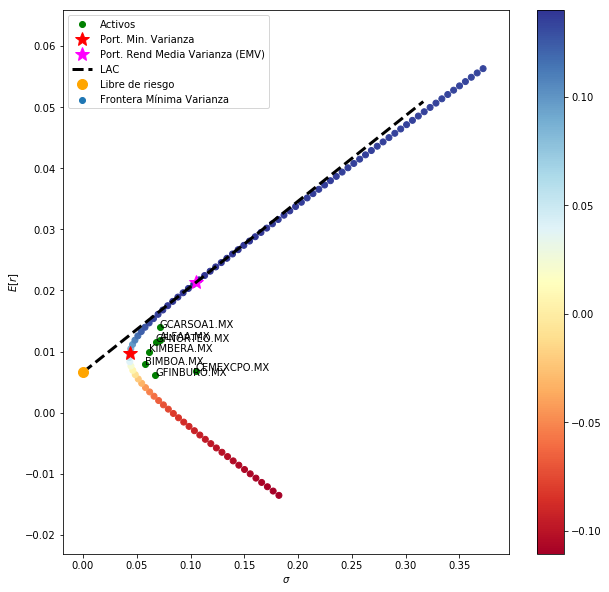

In [398]:
# Gráfica de dispersión de puntos coloreando MINVar y EMV 
# de acuerdo a SR
plt.figure(figsize=(10,10))
plt.scatter(frontera['sigma'], frontera['E[r]'], c = frontera['R.S.'], cmap='RdYlBu', 
            label='Frontera Mínima Varianza') #frontera de min var de n activos
plt.plot(monthly_summary.loc['Volatility'], monthly_summary.loc['Mean'], 'og', label='Activos') #activos individuales

x = monthly_summary.loc['Volatility'].values
y = monthly_summary.loc['Mean'].values
plt.text(x[0],y[0], 'GFNORTEO.MX')
plt.text(x[1],y[1], 'GFINBURO.MX')
plt.text(x[2],y[2],'CEMEXCPO.MX')
plt.text(x[3],y[3],'GCARSOA1.MX')
plt.text(x[4],y[4],'KIMBERA.MX')
plt.text(x[5],y[5],'BIMBOA.MX')
plt.text(x[6],y[6],'ALFAA.MX')

plt.plot(s_minvar, Er_minvar, '*r', ms=15, label = 'Port. Min. Varianza') #portafolios de minvar y EMV
plt.plot(s_EMV, Er_EMV, '*', color = 'magenta', ms=15, label = 'Port. Rend Media Varianza (EMV)')
plt.plot(LAC['sigma'],LAC['E[r]'],'k--',lw=3, label = 'LAC')
plt.plot(0, rf, 'o', color='orange', ms=10, label='Libre de riesgo')
plt.colorbar()
plt.xlabel('$\sigma$')
plt.ylabel('$E[r]$')
plt.legend(loc='best')
plt.show()

2. Suponga que usted está aconsejando a un cliente cuyo coeficiente de aversión al riesgo resultó ser 4. ¿Qué asignación de capital le sugeriría?, concluya acerca del porcentaje que se le asigna al portafolio EMV, si es muy bajo o muy alto, y porqué cree que se da esto (7% puntos).

In [399]:
gamma = 4
w = (Er_EMV-rf)/(gamma * s_EMV**2)
w, (1-w)

(0.331448415360514, 0.66855158463948605)

Ya que la ponderación es menor a 1, se le recomienda al cliente que tome posiciones largas tanto en activos libre de riesgo, como en los de mercado. En los activos de mercado se tendría que tomar una posición del 33.14%, mientras que en libre de riesgo el resto, es decir 66.85%
Esta asignación le provee el portafolio de media varianza, que es de mejor opción dentro de la frontera de mínima varianza. A mi parecer el portafolio de media varianza tiene una ponderación baja, puede darse a que los activos son muy riesgosos y amerita que se invierta más en la libre de riesgo para crear un buen portafolio. 

___
## II. Segunda parte. Estimando $\beta$ de un activo (30%)

**Punto 1 (15%).** En el archivo `dataUS.csv` se encuentran reportados los precios mensuales ajustados en el cierre del índice S&P 500 y los activos de Netflix, Nvidia, Facebook, y Google.

1. Importar los precios de *S&P 500 (^GSPC)* y de *Facebook (FB)* en un DataFrame indizado por fecha (5%). 
2. Obtener un DataFrame con los rendimientos porcentuales mensuales para estos activos (5%).
3. Calcular las matriz de varianza-covarianza (base mensual) (5%).

In [400]:
data2 = pd.read_csv("dataUS.csv", index_col='Date', usecols=['Date', '^GSPC', 'FB']) 
data2

,^GSPC,FB
Date,,
2015-11-01,2080.409912,104.239998
2015-12-01,2043.939941,104.660004
2016-01-01,1940.239990,112.209999
2016-02-01,1932.229980,106.919998
2016-03-01,2059.739990,114.099998
2016-04-01,2065.300049,117.580002
2016-05-01,2096.949951,118.809998
2016-06-01,2098.860107,114.279999
2016-07-01,2173.600098,123.940002


In [405]:
monthly_ret2 = data2.pct_change().dropna()
monthly_ret2

,^GSPC,FB
Date,,
2015-12-01,-0.017530,0.004029
2016-01-01,-0.050735,0.072138
2016-02-01,-0.004128,-0.047144
2016-03-01,0.065991,0.067153
2016-04-01,0.002699,0.030500
2016-05-01,0.015325,0.010461
2016-06-01,0.000911,-0.038128
2016-07-01,0.035610,0.084529
2016-08-01,-0.001219,0.017589


In [406]:
corr2 = monthly_ret2.corr()
corr2


,^GSPC,FB
^GSPC,1.000000,0.296811
FB,0.296811,1.000000


In [407]:
cov2 = monthly_ret2.cov()
cov2

,^GSPC,FB
^GSPC,0.000742,0.000528
FB,0.000528,0.004268


**Punto 2 (15%).** Usando los datos del punto anterior:

1. Estime $\beta_{FB}$ la beta de las acciones de Facebook (5%).
2. Compare su beta estimada con la que reporta Yahoo! Finance (5%).
3. ¿Qué puede decir acerca del valor de $\beta_{FB}$?, ¿Qué significa? (5%).

In [408]:
# Beta de FB
beta_FB = cov2['FB']['^GSPC']/cov2['^GSPC']['^GSPC']
np.round(beta_FB,2)

0.70999999999999996

En Yahoo finance la beta está calculada, con las mismas fechas, como .62
La Beta intenta medir el riesgo de un activo, por ejemplo una acción, respecto al mercado, y siempre teniendo en cuenta la relación entre el activo y el mercado.
Es decir, Yahoo Finance mide menor esta cantidad, refiriendose a que esta llega a estar menor relacionada al mercado del Standard & Purse que de lo que nuestros cálculos indican. Probablemente, Yahoo Finance toma en cuenta otros parámetros más elaborados para su mediciones de la beta, no solamente las covarianzas y el cálculo aritméticos visto en clase. Ya que nosotros tenemos esta correlación de 8 puntos más, indicando que según nostros la relación de FB al mercado es mucho mayor a la de Yahoo.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>